From: https://towardsdatascience.com/how-to-analyse-a-single-time-series-variable-11dcca7bf16c

## Stationarity and Weak Dependence

Stationarity has three requirements. The mean and variance of the time series data both are constant. In addition, the covariance of two time points with a lag (h) is a function of the lag, while it should not be dependent on time point (t).

Weak dependence requires that the correlation of two time points becomes zero when the lag h becomes infinity.

![](Pics/1_Pe_mnQW9CI__CKVpksGJTg.png)

## 1. Autoregressive Process and Moving Average Process

There are two common time series processes: autoregressive process and moving average process. We will discuss these two processes in detail.

### 1.1 Autoregressive Process Property

For autoregressive process, the time series data depends on itself with a time lag. When the time series data only depends on itself with a time lag of 1, the process is called AR(1). If the time series data depends on itself with a time lag of N, then the process is called AR(N).

Here, take AR(1) as an example. AR(1) process is stationary and weak dependent if two requirements are met: the expected value of the first time point is zero, and the time series is dependent on the previous time point with a multiplying parameter that lies in between -1 and 1.

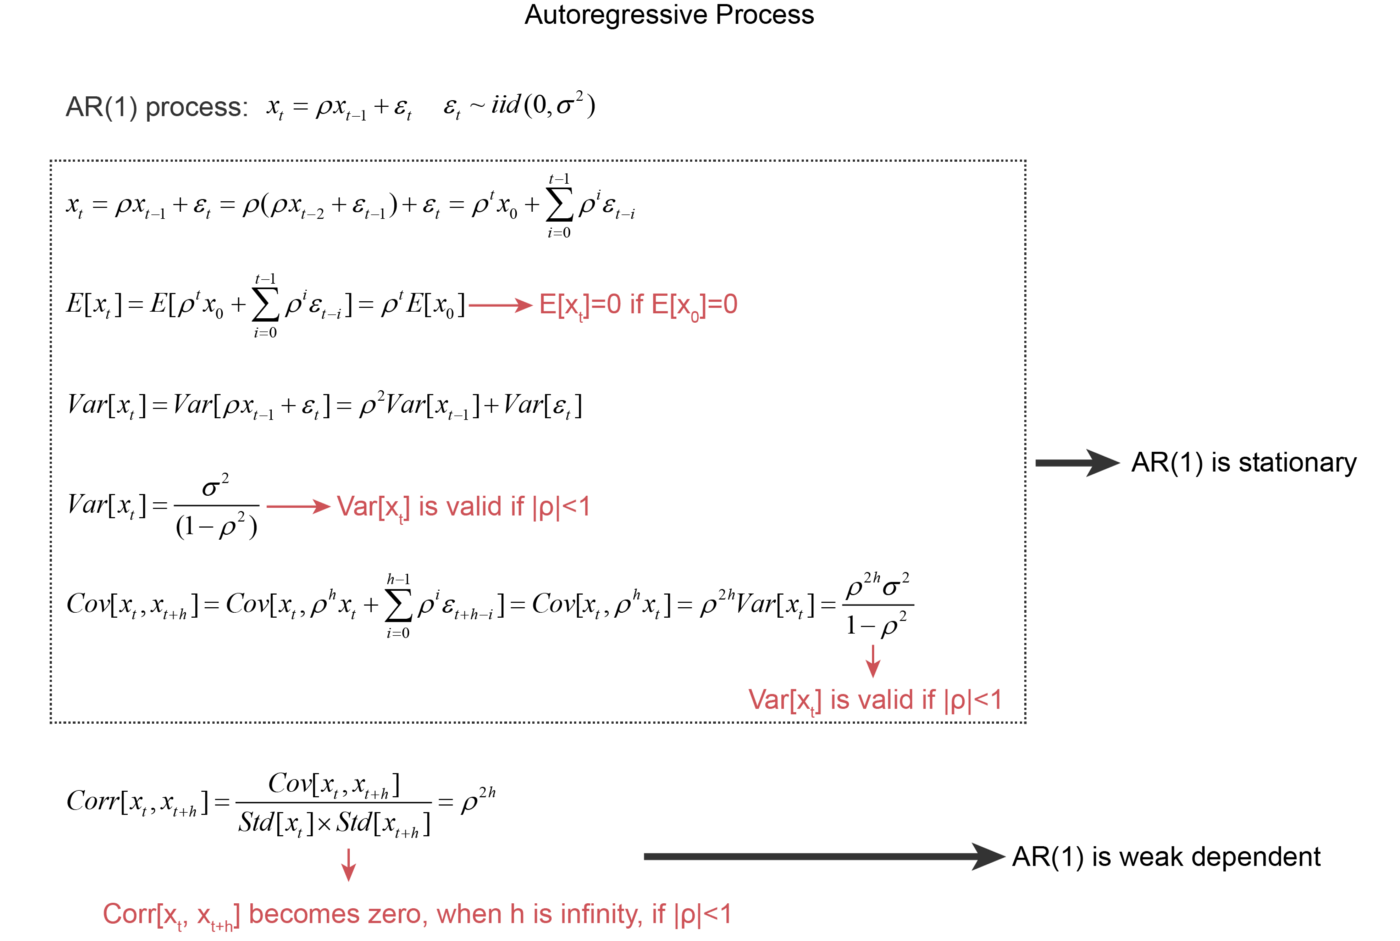

In AR(1) process, the value of ρ determines whether the AR(1) process is stationary. The following is a simple visualization of how ρ affects the AR(1) process. From the results, we can tell when ρ is closer to 1, the AR(1) process crosses zero line less frequently.

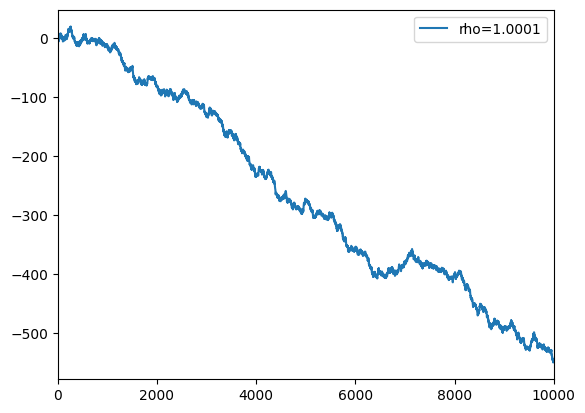

In [4]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000
rho = 1.0

sigma = np.random.normal(loc=0, scale=1, size=N)
x = [0.]
for i in range(1,N):
    #print(rho*x[-1]+sigma[i])
    x.append(rho*x[-1]+sigma[i])

plt.plot(x, label='rho={}'.format(rho))
plt.legend()
plt.xlim(0,N);

![](Pics/1_mXaS2V2phOC3AgznrpBLWw.png)

### 1.2 Moving Average Process Property

MA(1) process is stationary and weak dependent.

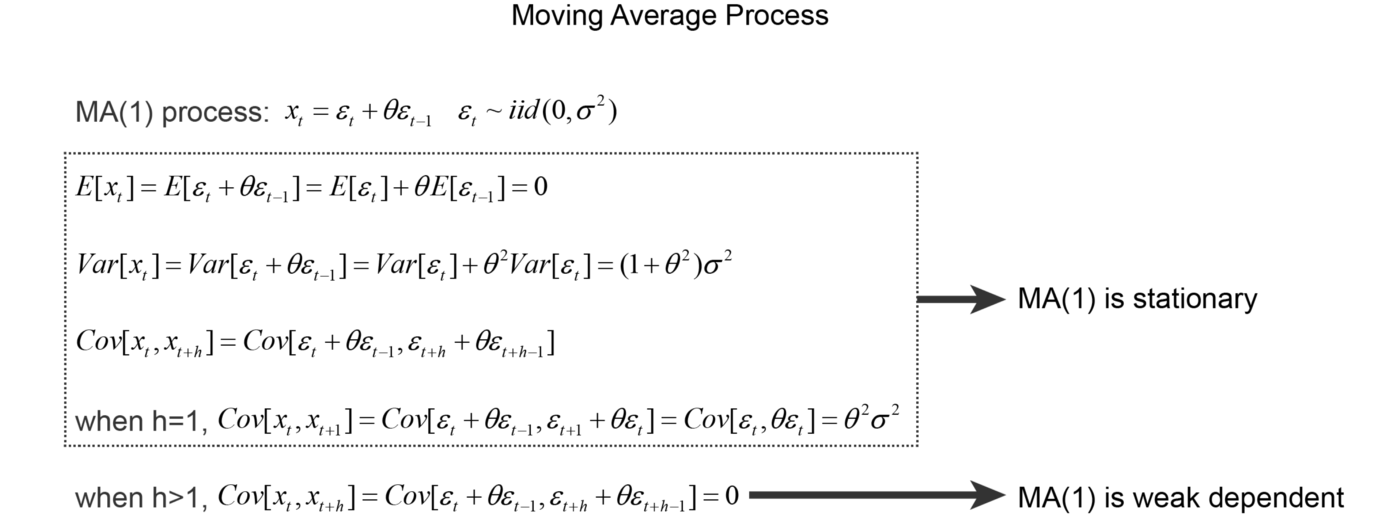

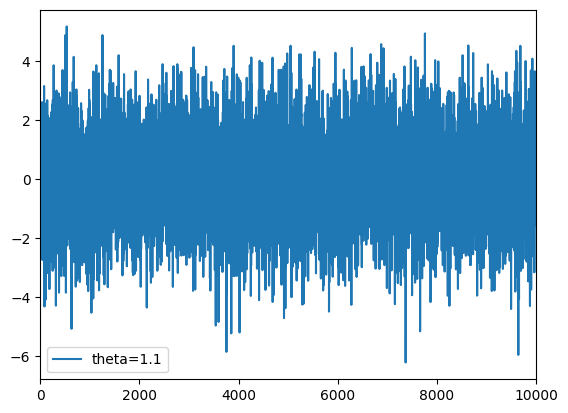

In [7]:
import numpy as np
import matplotlib.pyplot as plt


N = 10000
theta = 0.5

sigma = np.random.normal(loc=0, scale=1, size=N+1)
x = []
for i in range(1,N+1):
    x.append(sigma[i]+theta*sigma[i-1])

plt.plot(x, label='theta={}'.format(theta))
plt.legend()
plt.xlim(0,N);

### 1.3 Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)

According to the above MA(1) and AR(1) properties, we can write the correlation as follows:

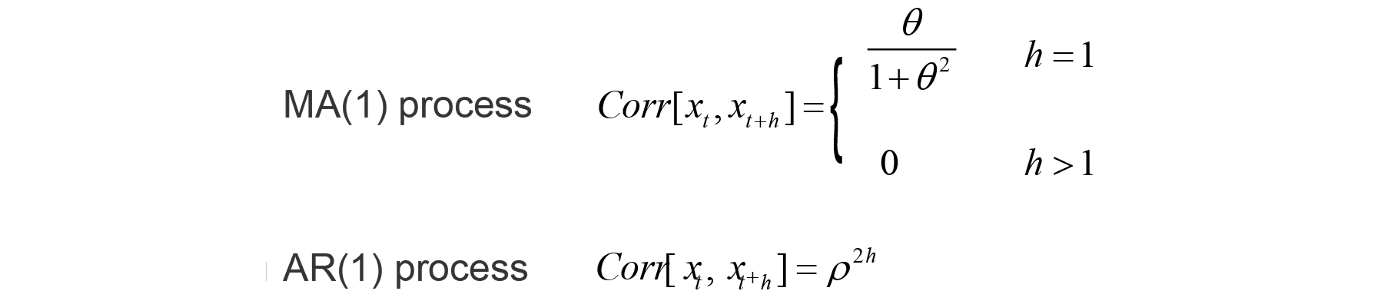

By plotting the correlation of different time lags, we can clearly see the difference between AR(1) process and MA(1) process. This correlation graph is called autocorrelation function (ACF). The ACF plot of AR process shows exponential decrease, and the correlation decreases to almost zero after several time points. However, the ACF plot of MA(1) process shows the correlation quickly drops towards zero after the first 2 time points.

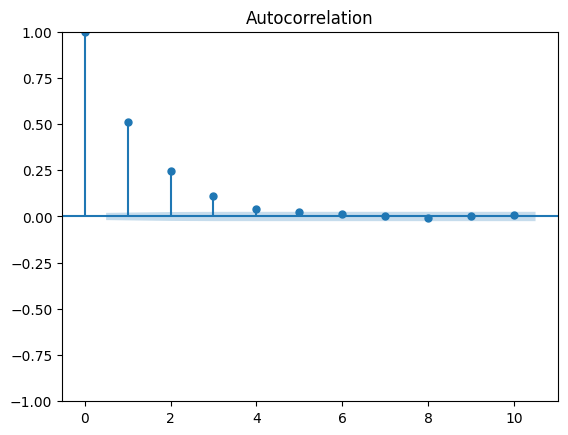

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

N = 10000
rho = 0.5

sigma = np.random.normal(loc=0, scale=1, size=N)
x = [0]
for i in range(1,N):
    x.append(rho*x[-1]+sigma[i])

plot_acf(np.array(x),lags=10);

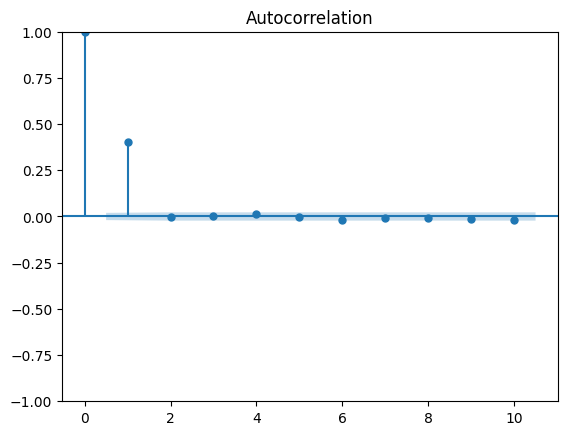

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

N = 10000
theta = 0.5

sigma = np.random.normal(loc=0, scale=1, size=N+1)
x = []
for i in range(1,N+1):
    x.append(sigma[i]+theta*sigma[i-1])

plot_acf(np.array(x),lags=10);

Although ACF plot can be used to differentiate MA and AR process, it cannot well differentiate AR(1) process from AR(2) process. Partial autocorrelation function (PACF) can be used to differentiate AR(1) and AR(2) process. As shown in the following example, PACF of AR(1) process shows the correlation quickly drops toward zero after the first 2 time points, while the PACF of AR(2) process shows the correlation drops toward zero after the first 3 time points.

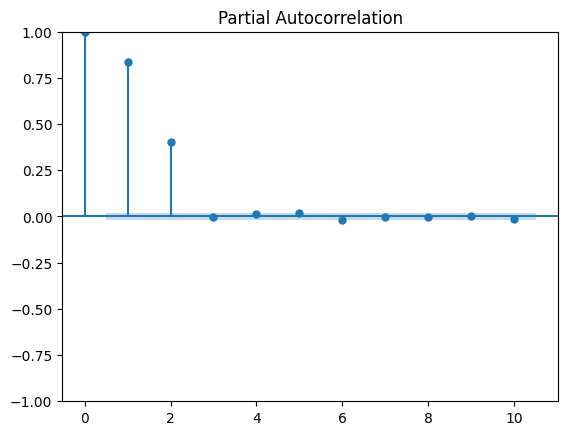

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

N = 10000
rho = 0.5
rho2 = 0.4

sigma = np.random.normal(loc=0, scale=1, size=N)
x = [0,0]
for i in range(2,N):
    x.append(rho*x[-1]+rho2*x[-2]+sigma[i])

plot_pacf(np.array(x),lags=10);

![](Pics/1_qvVd3kZfqeS-O2YmM2zv3g.png)

## 2. Order of Integration Process

### 2.1 Unit Root

As shown above, when ρ is 1, AR(1) process is non-stationary. The scenario where the ρ=1 in AR process is called unit root.

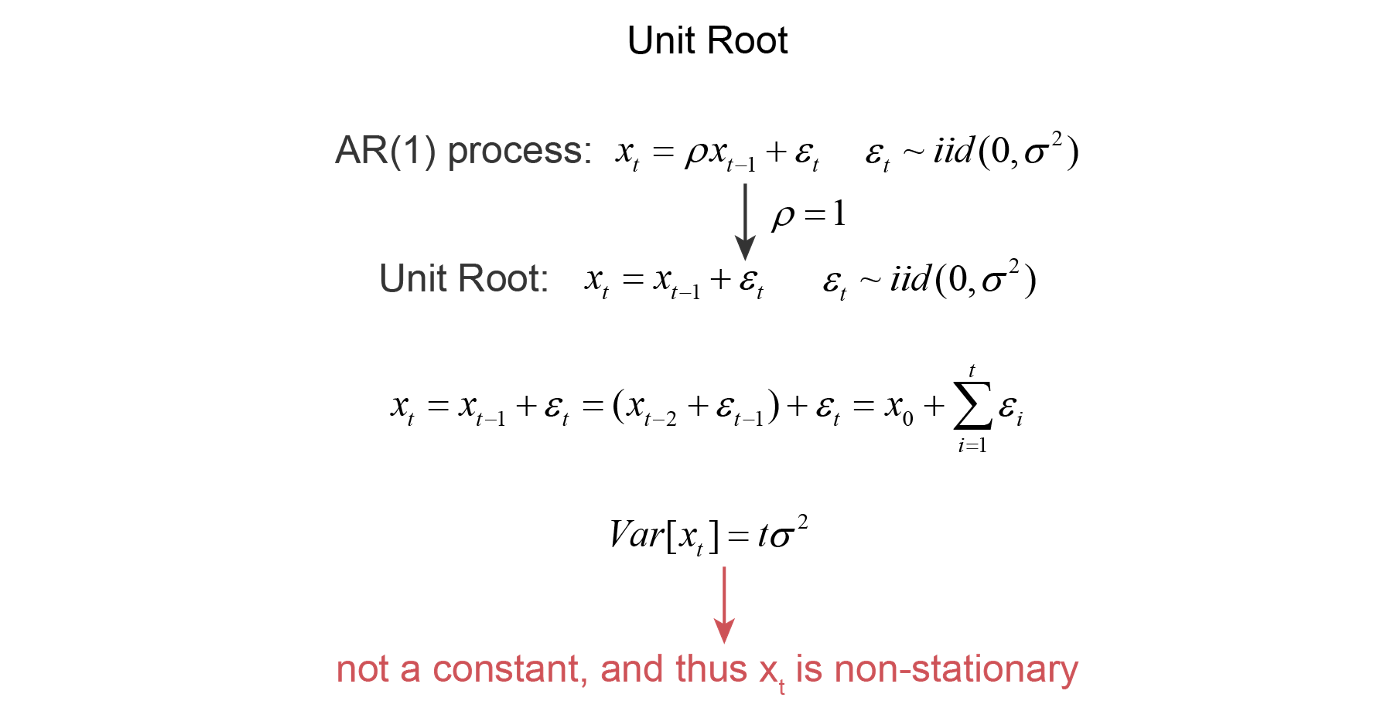



### 2.2 Order of Integration Process

For AR process with unit root, if the first order difference of the time series data is stationary, then the time series data follows I(1) process. Similarly, if the second order difference is required to get stationary data, then the process follows I(2) process. To find out the order of the integration process, a series of ADF need to be tested.

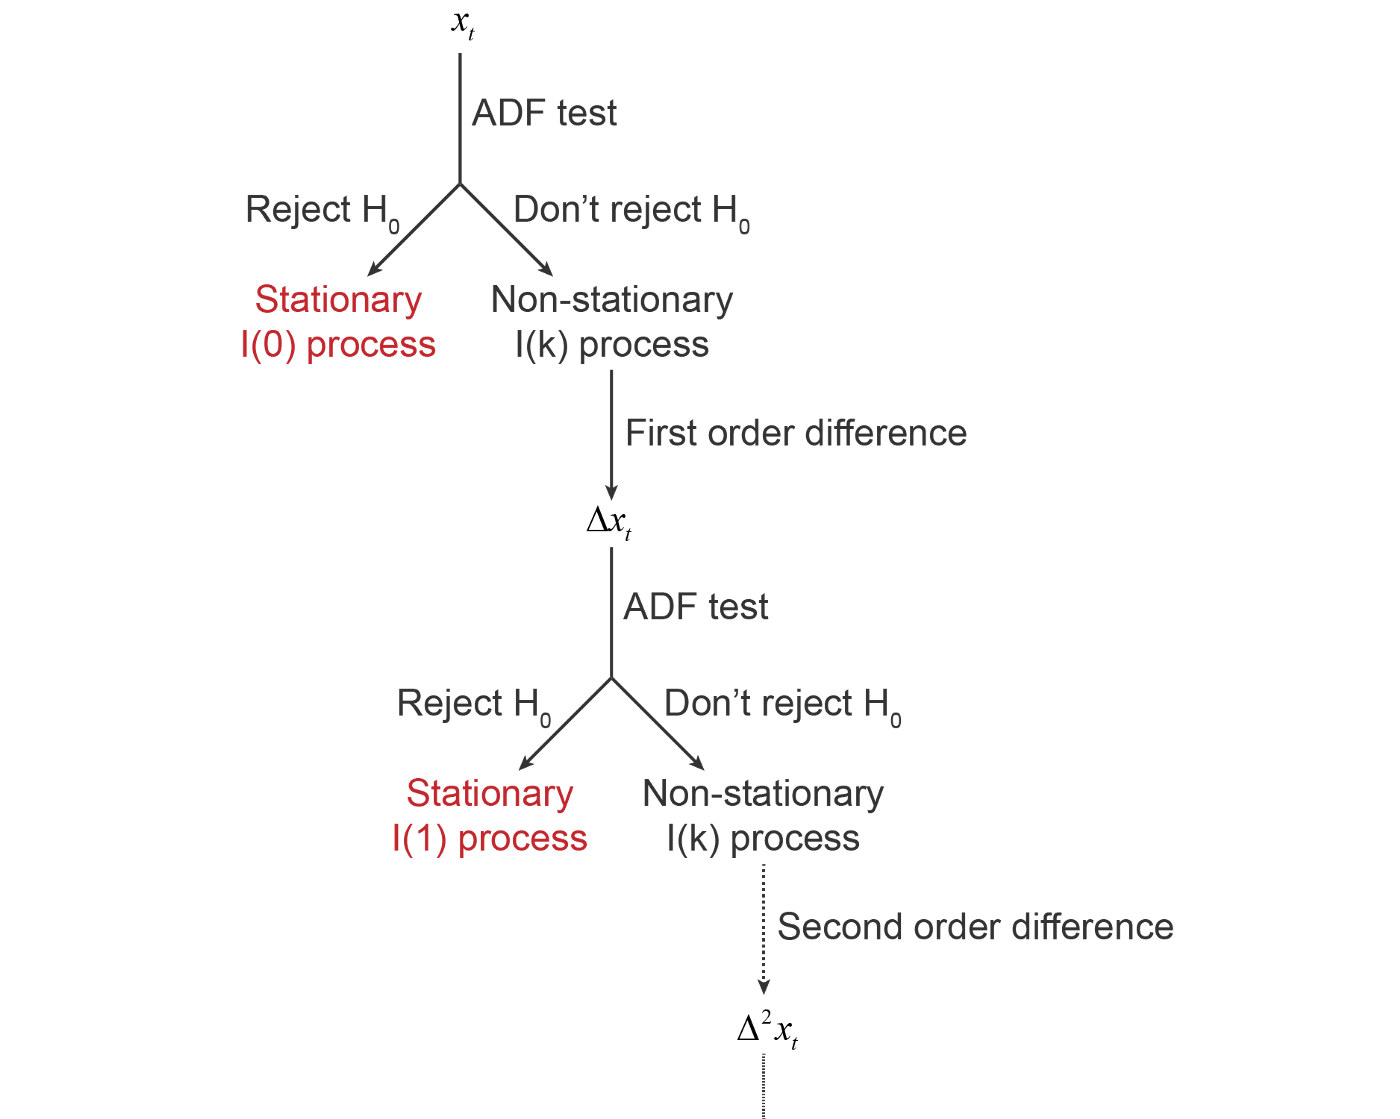